In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [22]:
#Diameter of the sphere
diameter = 0.02

#Density of the sphere
sDensity = 7870

#Density of the liquid
lDensity = 1420

#Starting velocity
startV = 0

#Gravitational acceleration
g = 9.82

#Depth in liquid were simulation stops
stopPosition = 0.1

#Step size
deltaT = 0.01

#Drag coeficient 
r = 90 * diameter / 2

In [23]:
#Calculated volume and mass of the sphere 
volume = (4 * math.pi * ((diameter/2) ** 3)) / 3
mass = sDensity * volume

In [24]:
def calcFg(tempMass, tempG):
    """Function to calculate the gravitational force"""
    return tempMass * tempG
def calcFl(tempP, tempV, tempG):
    """Function to calculate buoyant force on the sphere"""
    return tempP * tempV * tempG
def calcFv(tempR, tempV):
    """Function to calculate the drag force in laminar flow"""
    return tempR *tempV
def calcAccel(tempF, tempM):
    """Function to calculculate the acceleration"""
    return tempF / tempM


In [25]:
#Defining array

#Array with the deapths of the sphere
positionsArray = np.array([0])
#Array with the time
timeArray = np.array([0])
#Array with the velocity
velocityArray = np.array([startV])


#Defining variables
Fg = calcFg(mass, g)
Fl = calcFl(lDensity, volume, g)
Fv = calcFv(r,startV)
v = startV
t = 0
position = 0

#Executing Euler-Cromers step method
while (position <= stopPosition):

    #Calculating the acceleration
    a = calcAccel(Fg-Fl-Fv, mass)

    #Calculating the current velocity and adding it to the array
    v = v + a * deltaT
    velocityArray = np.append(velocityArray, v)

    #Calculating the curent positioon and adding it to the array
    position = position + v * deltaT
    positionsArray = np.append(positionsArray, position)

    #Calculating the drag force for the next step
    Fv = calcFv(r,v)

    #Incrementing the time and adding it to the array
    t = t + deltaT
    timeArray = np.append(timeArray, t)


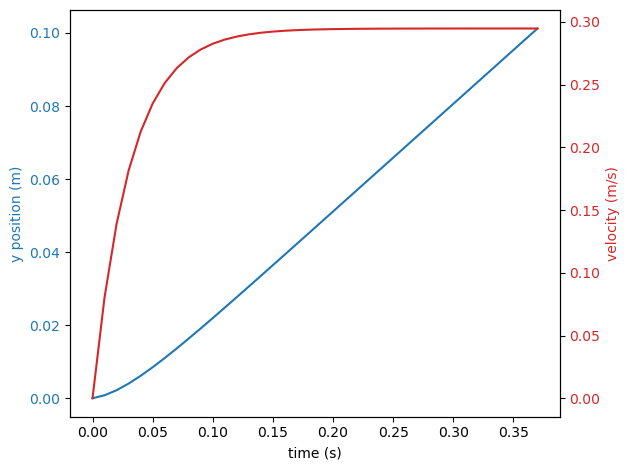

In [26]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('y position (m)', color=color)
ax1.plot(timeArray, positionsArray , color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('velocity (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeArray, velocityArray, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [27]:
velocityArray[-1]

0.29479087347106275